<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Homewrok: Neural Networks 2</center></h2>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RND_SEED = 7
np.random.seed(RND_SEED)

%matplotlib inline

# Intro

For this homework you are propossed to 
1. implement autoencoder model based on Keras library using MNIST sample.
2. set up your own dataset for transfer learning and apply pretrained model

# Autoencoders


Idea of autoencoders is illustrated in the following figure:
<center><img src='img/autoencoder_schema.jpg'></center>

Autoencoder consists of two parts: encoder and decoder.
Encoder takes an image and encodes it into another image or vector with smaller size. In other words, it compresses the image. On the other hand, decoder takes the compressed image and reconstructs the original image. If the autoencoder is designed and fitted properly, the original and reconstructed images will be similar. 

# Fully-connected Autoencoder

Consider an autoencoder which consists only fully-connected layers (no convolutions, no pooling et al.) as it is show in figure:

<center><img src='img/ae.png'></center>

This autoencoder takes an image as a vector and encodes it into a vector of smaller size. Its output is a reconstructed image represented as a vector of the same size as the input. 

## Task 1 (1 point)

Download and read MNIST sample. Plot several images. Do all preprocessing steps needed for the autoencoder.

Hint: use `from tensorflow.keras.datasets import mnist`

In [40]:
# Your code is here
from tensorflow.keras.datasets import mnist # import sample download function

(X_train, y_train), (X_test, y_test) = mnist.load_data() # dwonload and read MNIST sample

n_train, img_rows, img_cols = X_train.shape
n_test, _, _ = X_test.shape

n_train, n_test, img_rows, img_cols

11493376/11490434 [==============================] - 0s 0us/step


(60000, 10000, 28, 28)

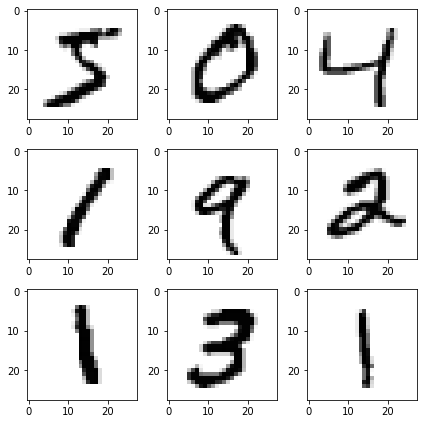

In [41]:
plt.figure(figsize=(6,6))
x, y = 3, 3
for i in range(x*y):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.gray_r, interpolation='nearest')
plt.tight_layout()
plt.show()

In [42]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


# Labels one-hot encoding
from tensorflow.keras.utils import to_categorical

n_classes = 10

y_train_hot = to_categorical(y_train, n_classes)
y_test_hot = to_categorical(y_test, n_classes)

## Task 2 (3 points)

Implement your autoencoder using Keras library with the following structure:
- **Encoder** has one fully-connected layer, that compresses an input image into a vector of size 49.
- **Decoder** has one fully-connected layer, that reconstructs the original image. 

Fit your autoencoder during 5 epochs. Use **mse** error function.

Hint: see Keras examples from your seminars.

In [43]:
X_train_nn = X_train.reshape((n_train, -1, ))
X_test_nn = X_test.reshape((n_test, -1, ))

In [44]:
# Your code is here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D
# this is the size of our encoded representations
model = Sequential() # init NN model
model.add(Dense(49, input_shape=X_train_nn[0].shape, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(X_train_nn[0].shape[0], activation='softmax'))

# Compile model
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 49)                38465     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               39200     
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(X_train_nn, X_train_nn, epochs=5, validation_data=(X_test_nn, X_test_nn))

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1103 - val_loss: 0.1119
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1099 - val_loss: 0.1118
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1099 - val_loss: 0.1118
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1098 - val_loss: 0.1118
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1098 - val_loss: 0.1118


## Task 3 (1 point)

Test your autoencoder. Calculate MSE error between inputs and outputs of the autoencoder. Plot several input and output images. Are they similar? 

In [46]:
# Your code is here
model.evaluate(X_test_nn, X_test_nn)

313/313 [==============================] - 0s 716us/step - loss: 0.1118


0.11177150905132294

In [47]:
pred = model.predict(X_test_nn).reshape(X_test.shape)

In [48]:
def show_plots(datasets, labels):
    columns = len(datasets)
    rows = 5

    _, ax = plt.subplots(rows, columns, sharex=True, figsize=(rows*columns, rows * 2))

    for i in range(rows):
        for j in range(columns):
            subplot = ax[i] if (columns == 1) else ax[i, j]
            if (i == 0):
                subplot.set_title(labels[j])
                
            subplot.imshow(datasets[j][i])  
    plt.show()

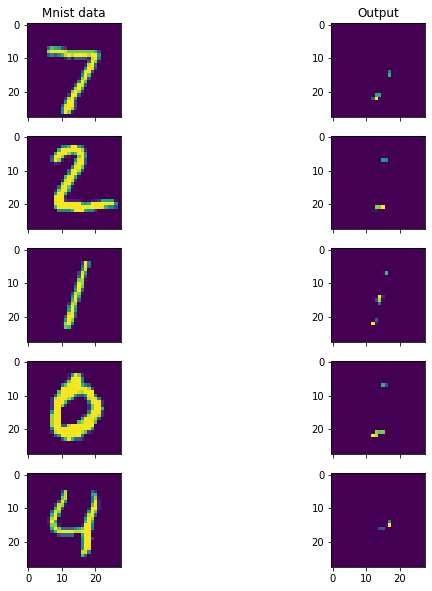

In [49]:
show_plots([X_test, pred], ["Mnist data", "Output"])

# Transfer Learning

In this task you should construct your own dataset to perform classification or regression task.
For instance you can
* Predict age (age group) given face image
* Classify different types of vehicles on the image
* Classify smartphone models
* [Your Idea Here]

## Task 4 (3 points)

Construct your dataset
* It should be you handmade raw dataset (not loaded completely in the web by someone else)
* It should contain at least 500 images (the more - the better)
* Once collected it should be downloadable via `wget` command in terminal (if you have windows you can check it in Google Collab) - for instance use dropbox or Yandex.Disk to get the link

Helpful links: [1](https://www.pyimagesearch.com/2018/04/09/how-to-quickly-build-a-deep-learning-image-dataset/), [2](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)

In [50]:
!wget https://www.dropbox.com/s/rilcpuogsg3gbzq/hw.zip?dl=0 -O hw.zip

--2020-05-23 18:34:38--  https://www.dropbox.com/s/rilcpuogsg3gbzq/hw.zip?dl=0
Распознаётся www.dropbox.com (www.dropbox.com)… 162.125.70.1
Подключение к www.dropbox.com (www.dropbox.com)|162.125.70.1|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 301 Moved Permanently
Адрес: /s/raw/rilcpuogsg3gbzq/hw.zip [переход]
--2020-05-23 18:34:38--  https://www.dropbox.com/s/raw/rilcpuogsg3gbzq/hw.zip
Повторное использование соединения с www.dropbox.com:443.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://ucca8cafabe8b9eaf9fd1131055d.dl.dropboxusercontent.com/cd/0/inline/A4SI0eEjsYM7YU9NvBFLoBallCB07qyMPsyurSTfRY9CBV3awqy7GmX3Gn1bZKzqg3Tlxhq490tQq58hG64kUJpu_Hc0QolHGBXfaCv7zfgYu4zxR9_xzfbhbRxoe4VriVk/file# [переход]
--2020-05-23 18:34:39--  https://ucca8cafabe8b9eaf9fd1131055d.dl.dropboxusercontent.com/cd/0/inline/A4SI0eEjsYM7YU9NvBFLoBallCB07qyMPsyurSTfRY9CBV3awqy7GmX3Gn1bZKzqg3Tlxhq490tQq58hG64kUJpu_Hc0QolHGBXfaCv7zfgYu4zxR9_xzfbhbRxoe4VriVk/file
Распо

In [51]:
!unzip hw.zip

Archive:  hw.zip
  inflating: y.xlsx                  
   creating: img/
   creating: img/lions/
  inflating: img/lions/00000000.jpg  
  inflating: img/lions/00000001.jpg  
  inflating: img/lions/00000003.jpg  
  inflating: img/lions/00000004.jpg  
  inflating: img/lions/00000005.jpg  
  inflating: img/lions/00000006.jpg  
  inflating: img/lions/00000007.jpg  
  inflating: img/lions/00000008.jpg  
  inflating: img/lions/00000009.jpg  
  inflating: img/lions/00000010.jpg  
  inflating: img/lions/00000011.jpg  
  inflating: img/lions/00000012.jpg  
  inflating: img/lions/00000013.jpg  
  inflating: img/lions/00000014.jpg  
  inflating: img/lions/00000015.jpg  
  inflating: img/lions/00000016.jpg  
  inflating: img/lions/00000017.jpg  
  inflating: img/lions/00000019.jpg  
  inflating: img/lions/00000020.jpg  
  inflating: img/lions/00000021.jpg  
  inflating: img/lions/00000022.jpg  
  inflating: img/lions/00000023.jpg  
  inflating: img/lions/00000024.jpg  
  inflating: img/lions/000000

  inflating: img/pandas/00000049.jpg  
  inflating: img/pandas/00000051.jpg  
  inflating: img/pandas/00000052.jpg  
  inflating: img/pandas/00000054.jpg  
  inflating: img/pandas/00000056.jpg  
  inflating: img/pandas/00000059.jpg  
  inflating: img/pandas/00000060.jpg  
  inflating: img/pandas/00000061.jpg  
  inflating: img/pandas/00000063.jpg  
  inflating: img/pandas/00000065.jpg  
  inflating: img/pandas/00000068.jpg  
  inflating: img/pandas/00000070.jpg  
  inflating: img/pandas/00000072.jpg  
  inflating: img/pandas/00000073.jpg  
  inflating: img/pandas/00000074.jpg  
  inflating: img/pandas/00000077.jpg  
  inflating: img/pandas/00000084.jpg  
  inflating: img/pandas/00000087.jpg  
  inflating: img/pandas/00000089.jpg  
  inflating: img/pandas/00000093.jpg  
  inflating: img/pandas/00000095.jpg  
  inflating: img/pandas/00000100.jpg  
  inflating: img/pandas/00000101.jpg  
  inflating: img/pandas/00000102.jpg  
  inflating: img/pandas/00000104.jpg  
  inflating: img/pandas/0

  inflating: img/wolf/00000184.jpg   
  inflating: img/wolf/00000186.jpg   
  inflating: img/wolf/00000187.jpg   
  inflating: img/wolf/00000190.jpg   
  inflating: img/wolf/00000192.jpg   
  inflating: img/wolf/00000198.jpg   
  inflating: img/wolf/00000199.jpg   
  inflating: img/wolf/00000200.jpg   
  inflating: img/wolf/00000201.jpg   
  inflating: img/wolf/00000203.jpg   
  inflating: img/wolf/00000204.jpg   
  inflating: img/wolf/00000205.jpg   
  inflating: img/wolf/00000209.jpg   
  inflating: img/wolf/00000210.jpg   
  inflating: img/wolf/00000212.jpg   
  inflating: img/wolf/00000213.jpg   
  inflating: img/wolf/00000214.jpg   
  inflating: img/wolf/00000215.jpg   
  inflating: img/wolf/00000216.jpg   
  inflating: img/wolf/00000217.jpg   
  inflating: img/wolf/00000218.jpg   
  inflating: img/wolf/00000219.jpg   
  inflating: img/wolf/00000220.jpg   
  inflating: img/wolf/00000221.jpg   
  inflating: img/wolf/00000222.jpg   
  inflating: img/wolf/00000224.jpg   
  inflating:

In [53]:
y = pd.read_excel('y.xlsx', sep='\t')

In [54]:
y

,y
0,lion
1,lion
2,lion
3,lion
4,lion
...,...
517,wolf
518,wolf
519,wolf
520,wolf


## Task 5 (1 point)

Prepare your dataset to be put through your model

* Resize and normalize images
* Split data in train and validation sets
* Prepare data generator with image augmentation for training set

In [56]:
import cv2
import os
import glob

In [80]:
img_width, img_height = 256, 256
batch_size = 64
epochs = 10
num_classes = 3

In [59]:
images = []
labels = []

for image_path in glob.glob('./img/lions/*.jpg'):
    try:
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_width, img_height))
            
        images.append(image)
        labels.append(0)
    except Exception as e:
        print(e)

In [62]:
for image_path in glob.glob('./img/pandas/*.jpg'):
    try:
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_width, img_height))
            
        images.append(image)
        labels.append(1)
    except Exception as e:
        print(e)

In [63]:
for image_path in glob.glob('./img/wolf/*.jpg'):
    try:
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_width, img_height))
            
        images.append(image)
        labels.append(2)
    except Exception as e:
        print(e)

In [99]:
images = np.array(images).astype(np.float32) / 255.0
labels = np.array(labels).astype(np.float32)

In [100]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [111]:
y_train.shape

(349, 3)

In [101]:
datagen = ImageDataGenerator(
    horizontal_flip = True,
    fill_mode = "nearest",
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3,
    rotation_range=30
)

## Task 5 (1 point)

* Use any pretrained model and replace dence layers
* Freeze (make untrainable) all weight except for dence layers weights and train your model
* Report train and validation losses
* Unfreeze other weights, report train validation losses

In [112]:
from tensorflow.keras import applications

model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))


#not fit all layers
for layer in model.layers[:5]:
    layer.trainable = False

In [113]:
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(3, activation="softmax")(x)

In [114]:
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

In [115]:
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = "categorical_crossentropy", 
                    optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), 
                    metrics=["accuracy"])

In [116]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [117]:
checkpoint = ModelCheckpoint("vgg19_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [118]:
model_final.fit(datagen.flow(X_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    steps_per_epoch=32,
                    validation_data=(X_test, y_test),
                    workers=4,
                    callbacks=[checkpoint, early])

Epoch 1/10
32/32 [==============================] - 1132s 35s/step - loss: 1.1939 - accuracy: 0.3465 - val_loss: 1.1235 - val_accuracy: 0.2312
Epoch 2/10
16/32 [==============>...............] - ETA: 9:09 - loss: 1.1354 - accuracy: 0.3482WARNING:tensorflow:Can save best model only with val_acc available, skipping.


32/32 [==============================] - 1329s 42s/step - loss: 1.1368 - accuracy: 0.3449 - val_loss: 1.0896 - val_accuracy: 0.3642
Epoch 3/10
32/32 [==============================] - 1209s 38s/step - loss: 1.1195 - accuracy: 0.3663 - val_loss: 1.0990 - val_accuracy: 0.3642


Epoch 4/10
32/32 [==============================] - 1239s 39s/step - loss: 1.1211 - accuracy: 0.3520 - val_loss: 1.0920 - val_accuracy: 0.3642
Epoch 5/10
16/32 [==============>...............] - ETA: 9:57 - loss: 1.1059 - accuracy: 0.3721 WARNING:tensorflow:Can save best model only with val_acc available, skipping.


32/32 [==============================] - 1796s 56s/step - loss: 1.1090 - accuracy: 0.3582 - val_loss: 1.0934 - val_accuracy: 0.3642
Epoch 6/10
32/32 [==============================] - 1805s 56s/step - loss: 1.1040 - accuracy: 0.3504 - val_loss: 1.0886 - val_accuracy: 0.3642


Epoch 7/10
32/32 [==============================] - 1243s 39s/step - loss: 1.1055 - accuracy: 0.3684 - val_loss: 1.0787 - val_accuracy: 0.3642
Epoch 8/10
16/32 [==============>...............] - ETA: 9:26 - loss: 1.1014 - accuracy: 0.3732WARNING:tensorflow:Can save best model only with val_acc available, skipping.


32/32 [==============================] - 1249s 39s/step - loss: 1.1005 - accuracy: 0.3721 - val_loss: 1.0806 - val_accuracy: 0.3642
Epoch 9/10
32/32 [==============================] - 1257s 39s/step - loss: 1.0993 - accuracy: 0.3785 - val_loss: 1.0966 - val_accuracy: 0.3642


Epoch 10/10
32/32 [==============================] - 1260s 39s/step - loss: 1.0968 - accuracy: 0.3808 - val_loss: 1.0824 - val_accuracy: 0.3642


In [123]:
from sklearn.metrics import accuracy_score

y_pred = model_final.predict(X_test)


In [125]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [134]:
y_last = []

for i in y_test:
    if i[0] == 1:
        y_last.append(0)
    if i[1] == 1:
        y_last.append(1)
    if i[2] == 1:
        y_last.append(2)
accuracy_score(y_pred_labels, y_last)

0.36416184971098264